In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [2]:
def load_results(file):
    STAT = {}
    for i in range(8):
        STAT[4*(2**i)] = []
    
    N = 5
    model_idx = None
    idx = 0
    
    fl = open(file, 'r')
    for line in fl.readlines():
        line = line.strip().split(' ')
        if len(line)==1:
            subline = line[0].strip().split('\t')
            if len(subline) > 1:
                model_idx = int(subline[1])
        if len(line)==4:
            STAT[model_idx].append(np.array(line).astype(np.float32))
    return STAT

In [3]:
STAT1 = load_results('results_max_pool_False.txt')
STAT2 = load_results('results_avg_pool_False.txt')
for i in range(8):
    STAT1[4*(2**i)] = np.stack(STAT1[4*(2**i)], 1)
    STAT2[4*(2**i)] = np.stack(STAT2[4*(2**i)], 1)

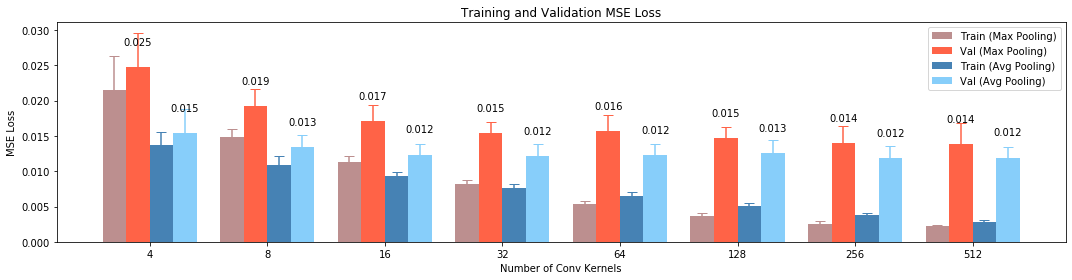

In [4]:
labels = ['4', '8', '16', '32', '64', '128', '256', '512']
train_loss_means_1 = [STAT1[int(x)][0].mean() for x in labels]
val_loss_means_1 = [STAT1[int(x)][2].mean() for x in labels]
train_loss_means_2 = [STAT2[int(x)][0].mean() for x in labels]
val_loss_means_2 = [STAT2[int(x)][2].mean() for x in labels]

train_loss_std_1 = [STAT1[int(x)][0].std() for x in labels]
val_loss_std_1 = [STAT1[int(x)][2].std() for x in labels]
train_loss_std_2 = [STAT2[int(x)][0].std() for x in labels]
val_loss_std_2 = [STAT2[int(x)][2].std() for x in labels]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(15,4))
rects1 = ax.bar(x - width*1.5, train_loss_means_1, width, yerr=train_loss_std_1, 
                label='Train (Max Pooling)', color='rosybrown', ecolor='rosybrown', capsize=5)
rects2 = ax.bar(x - width*0.5, val_loss_means_1, width, yerr=val_loss_std_1, 
                label='Val (Max Pooling)', color='tomato', ecolor='tomato', capsize=5)
rects3 = ax.bar(x + width*0.5, train_loss_means_2, width, yerr=train_loss_std_2, 
                label='Train (Avg Pooling)',  color='steelblue', ecolor='steelblue', capsize=5)
rects4 = ax.bar(x + width*1.5, val_loss_means_2, width, yerr=val_loss_std_2, 
                label='Val (Avg Pooling)', color='lightskyblue', ecolor='lightskyblue', capsize=5)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MSE Loss')
ax.set_xlabel('Number of Conv Kernels')
ax.set_title('Training and Validation MSE Loss')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format('%.3f' % height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 20),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects2)
autolabel(rects4)

fig.tight_layout()

plt.show()

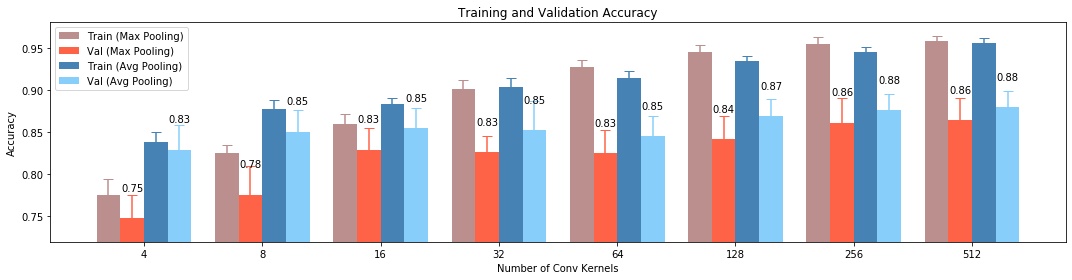

In [5]:
labels = ['4', '8', '16', '32', '64', '128', '256', '512']
train_loss_means_1 = [STAT1[int(x)][1].mean() for x in labels]
val_loss_means_1 = [STAT1[int(x)][3].mean() for x in labels]
train_loss_means_2 = [STAT2[int(x)][1].mean() for x in labels]
val_loss_means_2 = [STAT2[int(x)][3].mean() for x in labels]

train_loss_std_1 = [STAT1[int(x)][1].std() * 0.5 for x in labels]
val_loss_std_1 = [STAT1[int(x)][3].std() * 0.5 for x in labels]
train_loss_std_2 = [STAT2[int(x)][1].std() * 0.5 for x in labels]
val_loss_std_2 = [STAT2[int(x)][3].std() * 0.5 for x in labels]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(15,4))
rects1 = ax.bar(x - width*1.5, train_loss_means_1, width, yerr=train_loss_std_1, 
                label='Train (Max Pooling)', color='rosybrown', ecolor='rosybrown', capsize=5)
rects2 = ax.bar(x - width*0.5, val_loss_means_1, width, yerr=val_loss_std_1, 
                label='Val (Max Pooling)', color='tomato', ecolor='tomato', capsize=5)
rects3 = ax.bar(x + width*0.5, train_loss_means_2, width, yerr=train_loss_std_2, 
                label='Train (Avg Pooling)',  color='steelblue', ecolor='steelblue', capsize=5)
rects4 = ax.bar(x + width*1.5, val_loss_means_2, width, yerr=val_loss_std_2, 
                label='Val (Avg Pooling)', color='lightskyblue', ecolor='lightskyblue', capsize=5)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xlabel('Number of Conv Kernels')
ax.set_title('Training and Validation Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_ylim(0.72, 0.98)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format('%.2f' % height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 25),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects2)
autolabel(rects4)

fig.tight_layout()

plt.show()